In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

In [ ]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:
        return 'Date today: %s' % datetime.date.today()

In [ ]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [ ]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('/content/gdrive/MyDrive/dataset_trafficSign/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39215, 30, 30, 3) (39215,)
(31372, 30, 30, 3) (7843, 30, 30, 3) (31372,) (7843,)


In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 25
    history1 = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
981/981 [==============================] - 136s 135ms/step - loss: 1.9228 - accuracy: 0.4721 - val_loss: 0.5410 - val_accuracy: 0.8643
Epoch 2/25
981/981 [==============================] - 126s 129ms/step - loss: 0.7080 - accuracy: 0.7896 - val_loss: 0.2064 - val_accuracy: 0.9429
Epoch 3/25
981/981 [==============================] - 133s 135ms/step - loss: 0.4546 - accuracy: 0.8642 - val_loss: 0.2040 - val_accuracy: 0.9443
Epoch 4/25
981/981 [==============================] - 129s 131ms/step - loss: 0.3632 - accuracy: 0.8926 - val_loss: 0.2074 - val_accuracy: 0.9373
Epoch 5/25
981/981 [==============================] - 128s 131ms/step - loss: 0.3408 - accuracy: 0.9017 - val_loss: 0.1028 - val_accuracy: 0.9702
Epoch 6/25
981/981 [==============================] - 129s 131ms/step - loss: 0.2961 - accuracy: 0.9151 - val_loss: 0.1018 - val_accuracy: 0.9727
Epoch 7/25
981/981 [==============================] - 127s 129ms/step - loss: 0.2735 - accuracy: 0.9212 - val_loss: 0.0626 -

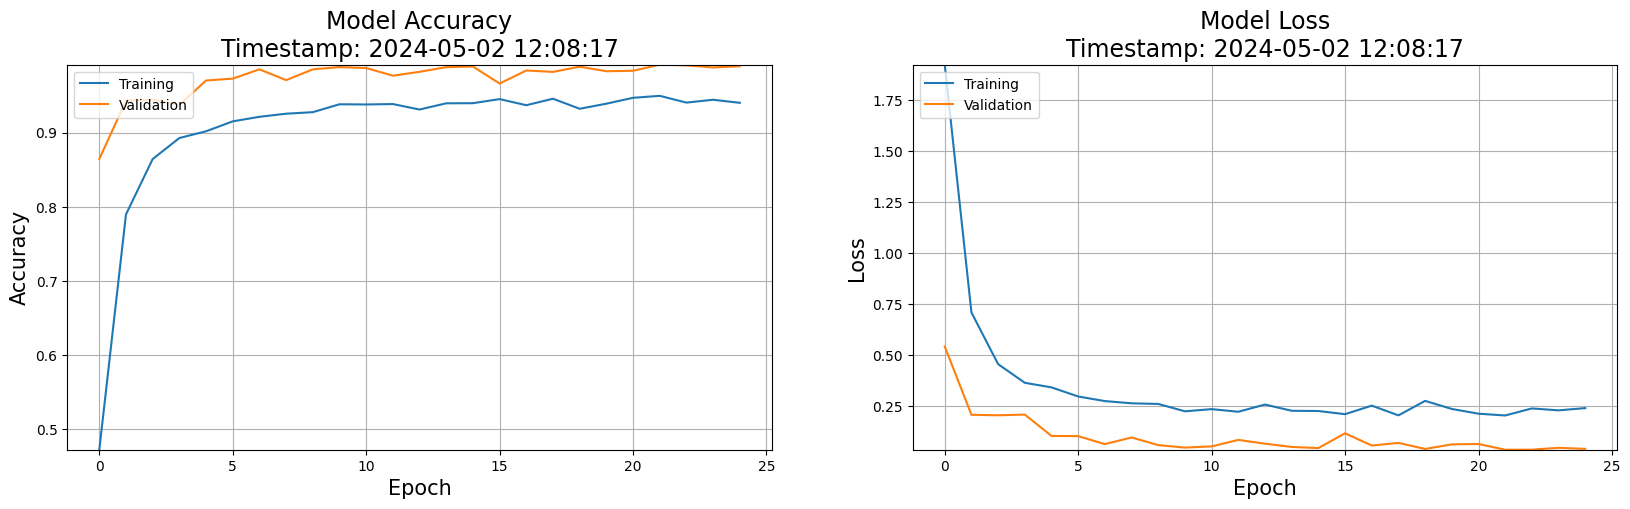

In [ ]:
plot_performance(history=history1)

## custom dataset epoch 50 dan 100

In [ ]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=100)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39215, 30, 30, 3) (39215,)
(27450, 30, 30, 3) (11765, 30, 30, 3) (27450,) (11765,)


In [ ]:
# Building the model
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(43, activation='softmax'))

# Compilation of the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='categorical_crossentropy', metrics='accuracy')

#Model display
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

In [ ]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 50
    history2 = model_2.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50
429/429 [==============================] - 123s 283ms/step - loss: 2.4471 - accuracy: 0.4007 - val_loss: 0.8035 - val_accuracy: 0.8167
Epoch 2/50
429/429 [==============================] - 112s 261ms/step - loss: 0.9723 - accuracy: 0.7179 - val_loss: 0.4327 - val_accuracy: 0.8994
Epoch 3/50
429/429 [==============================] - 111s 258ms/step - loss: 0.6644 - accuracy: 0.8012 - val_loss: 0.2312 - val_accuracy: 0.9361
Epoch 4/50
429/429 [==============================] - 113s 263ms/step - loss: 0.4810 - accuracy: 0.8544 - val_loss: 0.1594 - val_accuracy: 0.9565
Epoch 5/50
429/429 [==============================] - 112s 260ms/step - loss: 0.3876 - accuracy: 0.8862 - val_loss: 0.1469 - val_accuracy: 0.9577
Epoch 6/50
429/429 [==============================] - 120s 281ms/step - loss: 0.3122 - accuracy: 0.9066 - val_loss: 0.1085 - val_accuracy: 0.9689
Epoch 7/50
429/429 [==============================] - 113s 263ms/step - loss: 0.2772 - accuracy: 0.9157 - val_loss: 0.0939 -

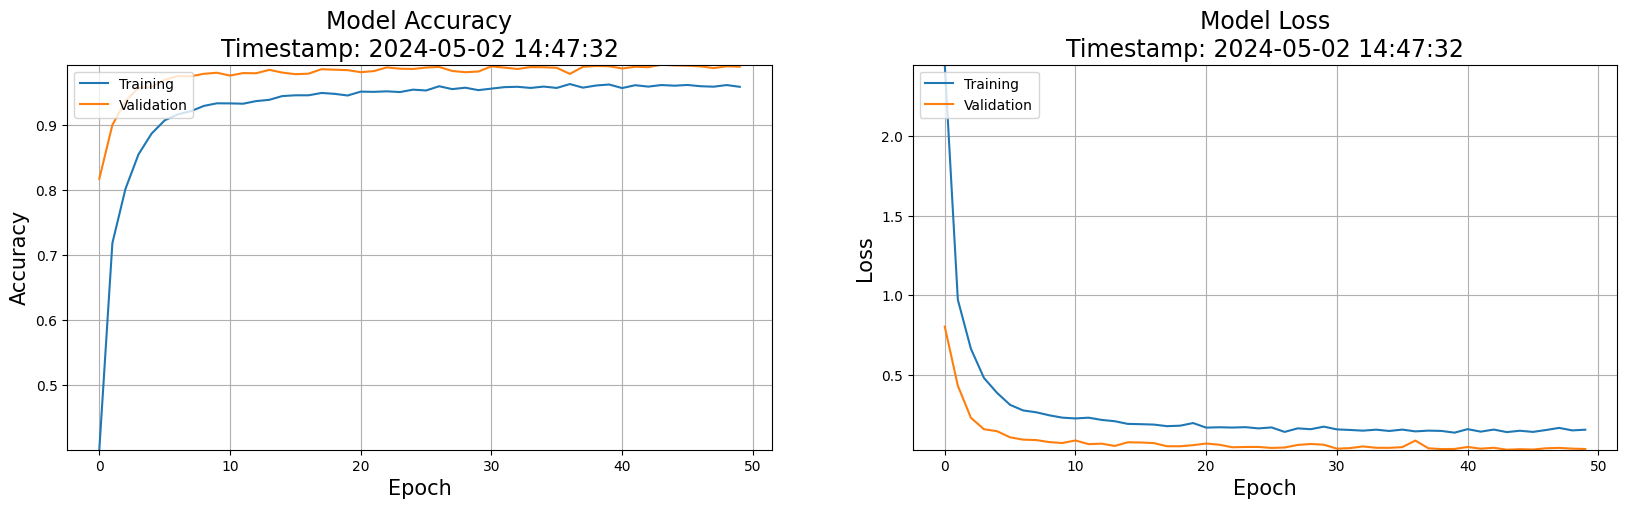

In [ ]:
plot_performance(history=history2)